In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
import pandas as pd
import h5py

from typing import NamedTuple

In [127]:
metrics = ("fan1", "fan2", "foil1", "foil2")

# Neuron Number Effect

In [119]:
all_res = []

with h5py.File("../data/num_neurons.h5", "r") as fi:
    
    for n_neurons, seeds in fi.items():
        for met in metrics:
            tmp_res = np.array([np.array(v[met]).T for v in fi[n_neurons].values()])
            all_res.append(
                (n_neurons, 1e-4, met, tmp_res.reshape(
                    (tmp_res.shape[0]*tmp_res.shape[1], -1))))

In [120]:
df = pd.DataFrame(all_res, columns=("n_neurons", "voja_rate", "response", "value"))
df

,n_neurons,voja_rate,response,value
0,10,0.0001,fan1,"[[0.0, 0.0, 0.0, 0.0, 9.95016625083, 9.8511604..."
1,10,0.0001,fan2,"[[52.4349260728, 51.913189841, 51.3966449715, ..."
2,10,0.0001,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,30,0.0001,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 9.95016625083, 9.85..."
4,30,0.0001,fan2,"[[52.8477983879, 52.3219540079, 51.801341867, ..."
5,30,0.0001,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,50,0.0001,fan1,"[[0.0, 0.0, 0.0, 0.0, 9.95016625083, 9.8511604..."
7,50,0.0001,fan2,"[[74.469670022, 73.7286844247, 72.9950717572, ..."
8,50,0.0001,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


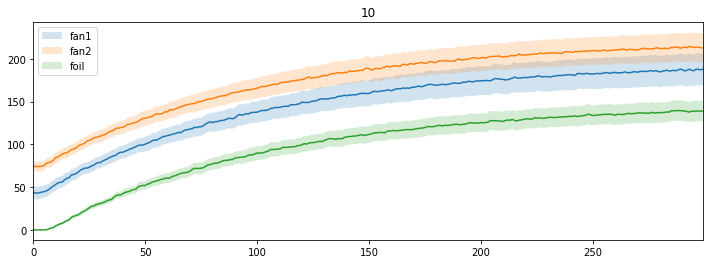

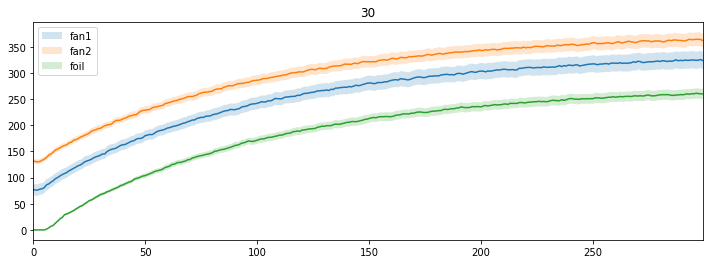

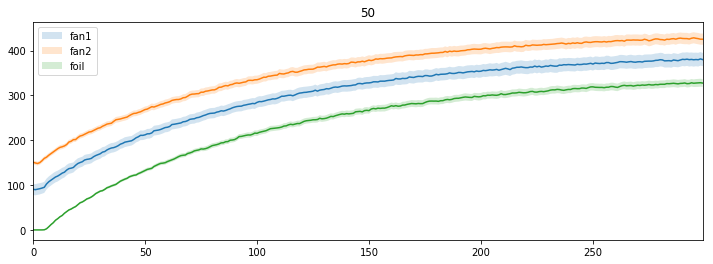

In [121]:
resps = df.response.unique()
n_neurons = np.sort(df.n_neurons.unique())

for nrn in n_neurons:
    plt.figure(figsize=(12, 4))
    plt.title(nrn)
    
    for r_i, resp in enumerate(resps):
        dat = df[(df.response == resp) & (df.n_neurons == nrn)].iloc[0].value
        sns.tsplot(dat, color="C%s" % r_i)
    
    plt.legend(resps)

# Voja Learning Rate Effect

In [131]:
all_res = []

with h5py.File("../data/fixed_foil.h5", "r") as fi:
    
    for voja_rate, seeds in fi.items():
        for met in metrics:
            tmp_res = np.array([np.array(v[met]).T for v in fi[voja_rate].values()])
            all_res.append(
                (10, float(voja_rate), met, tmp_res.reshape(
                    (tmp_res.shape[0]*tmp_res.shape[1], -1))))

In [132]:
df = pd.DataFrame(all_res, columns=("n_neurons", "voja_rate", "response", "value"))
df

,n_neurons,voja_rate,response,value
0,10,0.00010,fan1,"[[0.0, 0.0, 0.0, 0.0, 9.95016625083, 9.8511604..."
1,10,0.00010,fan2,"[[74.4689398746, 73.7279615423, 72.9943560677,..."
2,10,0.00010,foil1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.9501662..."
3,10,0.00010,foil2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,10,0.00001,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.9003325017,..."
5,10,0.00001,fan2,"[[65.449368163, 64.7981360687, 64.1533838421, ..."
6,10,0.00001,foil1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.9501662..."
7,10,0.00001,foil2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
8,10,0.00050,fan1,"[[0.0, 0.0, 0.0, 9.95016625083, 19.8013266932,..."
9,10,0.00050,fan2,"[[136.437755197, 135.08017685, 133.736106633, ..."


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


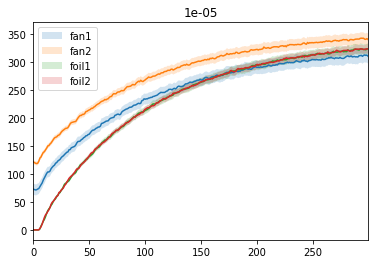

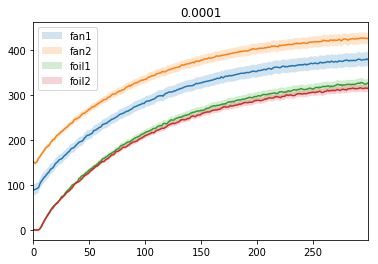

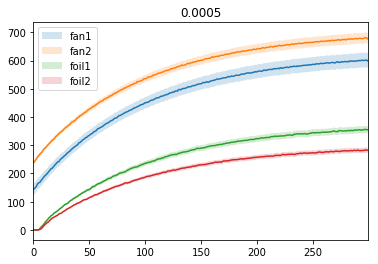

In [133]:
resps = df.response.unique()
voja_rates = np.sort(df.voja_rate.unique())

for vr in voja_rates:
    plt.figure()
    plt.title(vr)
    
    for r_i, resp in enumerate(resps):
        dat = df[(df.response == resp) & (df.voja_rate == vr)].iloc[0].value
        sns.tsplot(dat, color="C%s" % r_i)
    
    plt.legend(resps)

# Finer Granularity Voja Learning Rate Effect

In [122]:
all_res = []

with h5py.File("../data/basic_match.h5", "r") as fi:
    
    for voja_rate, seeds in fi.items():
        for met in metrics:
            tmp_res = np.array([np.array(v[met]).T for v in fi[voja_rate].values()])
            all_res.append(
                (10, float(voja_rate), met, tmp_res.reshape(
                    (tmp_res.shape[0]*tmp_res.shape[1], -1))))

In [123]:
df = pd.DataFrame(all_res, columns=("n_neurons", "voja_rate", "response", "value"))
df

,n_neurons,voja_rate,response,value
0,10,0.000010,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 19.9003325017, 39.6..."
1,10,0.000010,fan2,"[[113.272976532, 112.145891584, 111.030021318,..."
2,10,0.000010,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,10,0.000025,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 29.8504987525, 29.5..."
4,10,0.000025,fan2,"[[116.006486895, 114.852203065, 113.70940455, ..."
5,10,0.000025,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,10,0.000050,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 29.8504987525, 29.5..."
7,10,0.000050,fan2,"[[121.373572618, 120.165885392, 118.970214854,..."
8,10,0.000050,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,10,0.000005,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 9.95016625083, 49.6..."


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


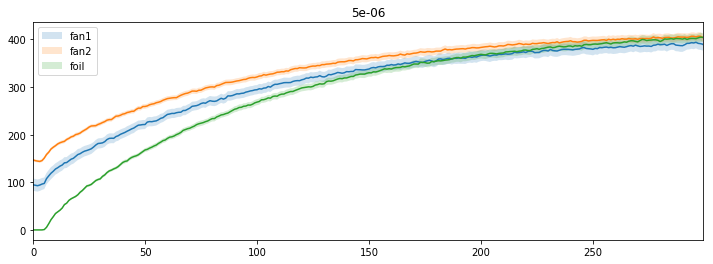

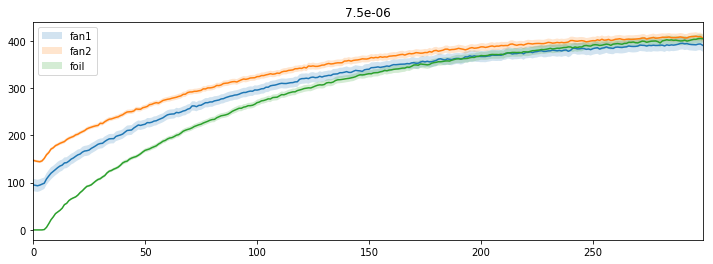

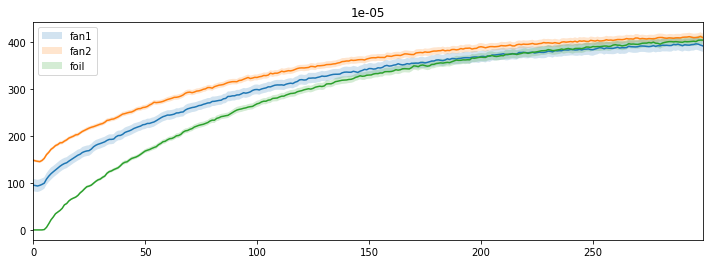

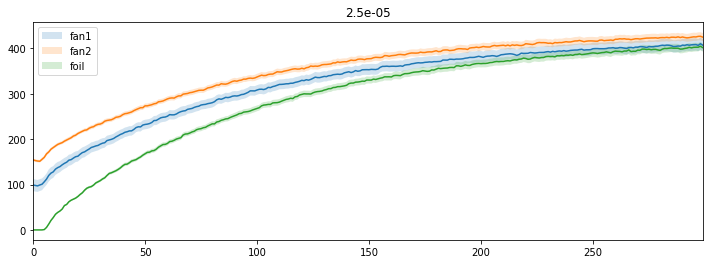

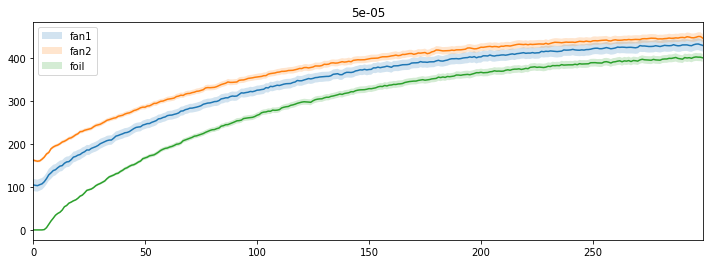

In [117]:
resps = df.response.unique()
voja_rates = np.sort(df.voja_rate.unique())

for vr in voja_rates:
    plt.figure(figsize=(12, 4))
    plt.title(vr)
    
    for r_i, resp in enumerate(resps):
        dat = df[(df.response == resp) & (df.voja_rate == vr)].iloc[0].value
        sns.tsplot(dat, color="C%s" % r_i)
    
    plt.legend(resps)

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


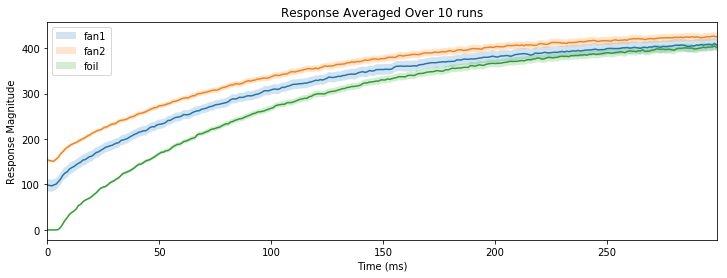

In [125]:
plt.figure(figsize=(12, 4))
plt.title("Response Averaged Over 10 runs")

for r_i, resp in enumerate(resps):
    dat = df[(df.response == resp) & (df.voja_rate == 2.5e-5)].iloc[0].value
    sns.tsplot(dat, color="C%s" % r_i)

plt.ylabel("Response Magnitude")
plt.xlabel("Time (ms)")
plt.legend(resps)

# Even Finer Granularity Voja Learning Rate Effect

In [115]:
all_res = []

with h5py.File("../data/finer_match.h5", "r") as fi:
    
    for voja_rate, seeds in fi.items():
        for met in metrics:
            tmp_res = np.array([np.array(v[met]).T for v in fi[voja_rate].values()])
            all_res.append(
                (10, float(voja_rate), met, tmp_res.reshape(
                    (tmp_res.shape[0]*tmp_res.shape[1], -1))))

In [116]:
df = pd.DataFrame(all_res, columns=("n_neurons", "voja_rate", "response", "value"))
df

,n_neurons,voja_rate,response,value
0,10,0.000010,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 19.9003325017, 39.6..."
1,10,0.000010,fan2,"[[113.272976532, 112.145891584, 111.030021318,..."
2,10,0.000010,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,10,0.000025,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 29.8504987525, 29.5..."
4,10,0.000025,fan2,"[[116.006486895, 114.852203065, 113.70940455, ..."
5,10,0.000025,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,10,0.000050,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 29.8504987525, 29.5..."
7,10,0.000050,fan2,"[[121.373572618, 120.165885392, 118.970214854,..."
8,10,0.000050,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
9,10,0.000005,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 9.95016625083, 49.6..."


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


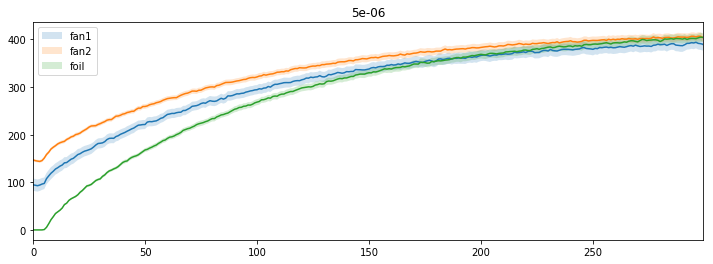

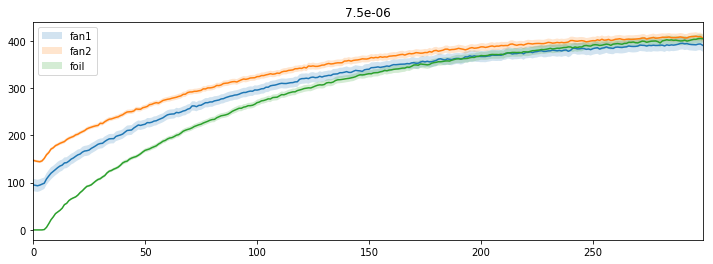

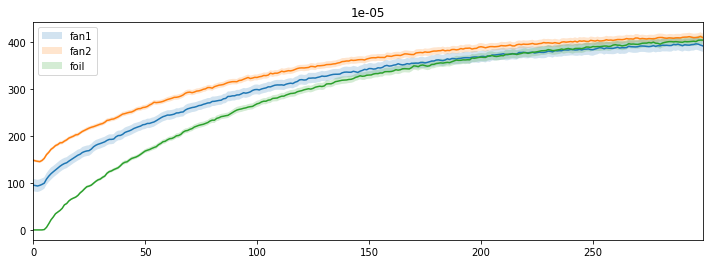

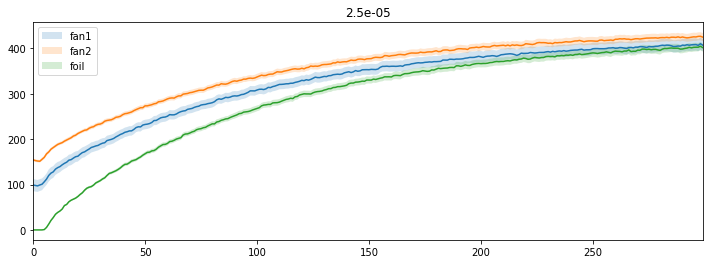

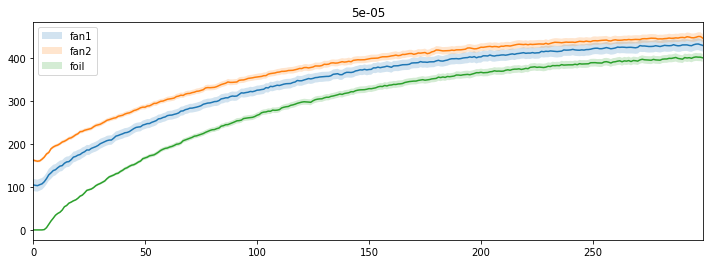

In [117]:
resps = df.response.unique()
voja_rates = np.sort(df.voja_rate.unique())

for vr in voja_rates:
    plt.figure(figsize=(12, 4))
    plt.title(vr)
    
    for r_i, resp in enumerate(resps):
        dat = df[(df.response == resp) & (df.voja_rate == vr)].iloc[0].value
        sns.tsplot(dat, color="C%s" % r_i)
    
    plt.legend(resps)

# Training Repetitions Effect

In [105]:
all_res = []
voja_rate = 1e-5

with h5py.File("../data/rep_exp.h5", "r") as fi:
    
    for n_reps, seeds in fi.items():
        for met in metrics:
            tmp_res = np.array([np.array(v[met]).T for v in fi[n_reps].values()])
            all_res.append(
                (n_reps, 10, voja_rate, met, tmp_res.reshape(
                    (tmp_res.shape[0]*tmp_res.shape[1], -1))))

In [106]:
df = pd.DataFrame(all_res, columns=("n_reps", "n_neurons", "voja_rate", "response", "value"))
df

,n_reps,n_neurons,voja_rate,response,value
0,15,10,0.00001,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.9003325017,..."
1,15,10,0.00001,fan2,"[[60.3324768755, 59.7321587003, 59.1378137907,..."
2,15,10,0.00001,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,20,10,0.00001,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.9003325017,..."
4,20,10,0.00001,fan2,"[[65.4488185137, 64.7975918886, 64.1528450766,..."
5,20,10,0.00001,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
6,25,10,0.00001,fan1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 19.9003325017,..."
7,25,10,0.00001,fan2,"[[61.1655521467, 60.556944734, 59.9543930663, ..."
8,25,10,0.00001,foil,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


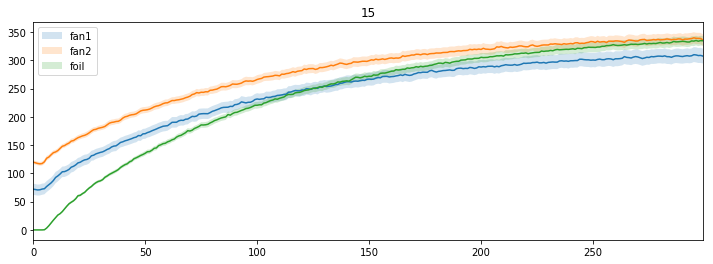

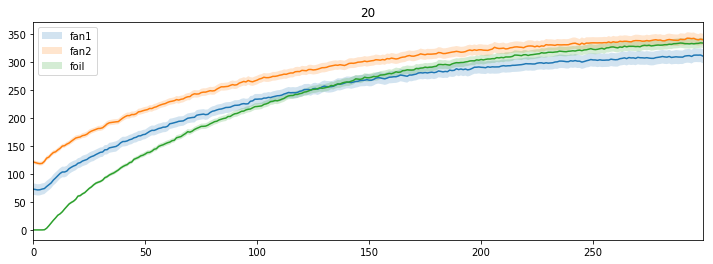

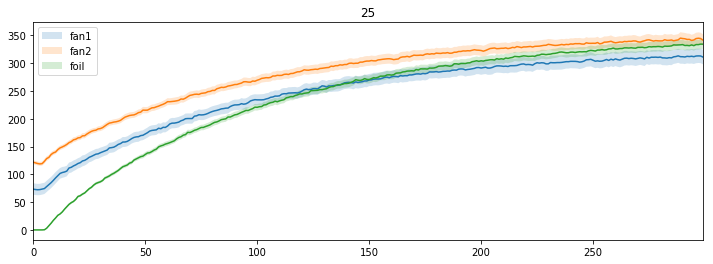

In [108]:
resps = df.response.unique()
n_reps = np.sort(df.n_reps.unique())

for n_rep in n_reps:
    plt.figure(figsize=(12, 4))
    plt.title(n_rep)
    
    for r_i, resp in enumerate(resps):
        dat = df[(df.response == resp) & (df.n_reps == n_rep)].iloc[0].value
        sns.tsplot(dat, color="C%s" % r_i)
    
    plt.legend(resps)

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


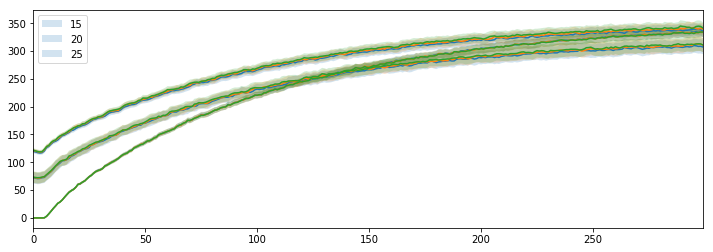

In [109]:
resps = df.response.unique()
n_reps = np.sort(df.n_reps.unique())

plt.figure(figsize=(12, 4))

for n_i, n_rep in enumerate(n_reps):
    for resp in resps:
        dat = df[(df.response == resp) & (df.n_reps == n_rep)].iloc[0].value
        sns.tsplot(dat, color="C%s" % n_i)
    
plt.legend(n_reps)

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


(150, 350)

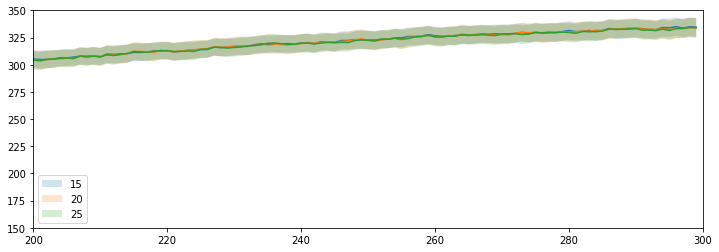

In [111]:
resps = df.response.unique()
n_reps = np.sort(df.n_reps.unique())

plt.figure(figsize=(12, 4))

for n_i, n_rep in enumerate(n_reps):
    dat = df[(df.response == "foil") & (df.n_reps == n_rep)].iloc[0].value
    sns.tsplot(dat, color="C%s" % n_i)
    
plt.legend(n_reps)
plt.xlim(200, 300)
plt.ylim(150, 350)

The amount of training repitions seems to have almost no effect.